Python case study case 2: Youtube Subscribers Data 2024
Data set resources [here](https://www.kaggle.com/datasets/rashminslnk/youtube-subscribers-data-2024/data)

Let´s observe and have a better view of the dataset first

In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:\\Users\\vielu\\OneDrive\\Documents\\Data Analysis\\Python Study\\youtube_subscribers_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    50 non-null     object 
 1   Brand channel           50 non-null     object 
 2   Subscribers (millions)  50 non-null     float64
 3   Primary language        50 non-null     object 
 4   Category                50 non-null     object 
 5   Country                 50 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.5+ KB


In [16]:
df.head()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,MrBeast,No,335.0,English,Entertainment,United States
1,T-Series,Yes,280.0,Hindi,Music,India
2,Cocomelon - Nursery Rhymes,Yes,186.0,English,Education,United States
3,SET India,Yes,180.0,Hindi,Entertainment,India
4,Vlad and Niki,No,129.0,English,Entertainment,Russia


1. What are the top 10 channel in 2024?

                         Name Brand channel  Subscribers (millions)  \
0                     MrBeast            No                   335.0   
1                    T-Series           Yes                   280.0   
2  Cocomelon - Nursery Rhymes           Yes                   186.0   
3                   SET India           Yes                   180.0   
4               Vlad and Niki            No                   129.0   
5             Kids Diana Show           Yes                   128.0   
6                 Like Nastya            No                   123.0   
7                   Zee Music           Yes                   112.0   
8                   PewDiePie            No                   110.0   
9                         WWE           Yes                   105.0   

  Primary language       Category                 Country  
0          English  Entertainment           United States  
1            Hindi          Music                   India  
2          English      Education     

<Axes: title={'center': 'Top 10 Youtube Channel in 2024'}, xlabel='Name', ylabel='Subscribers (millions)'>

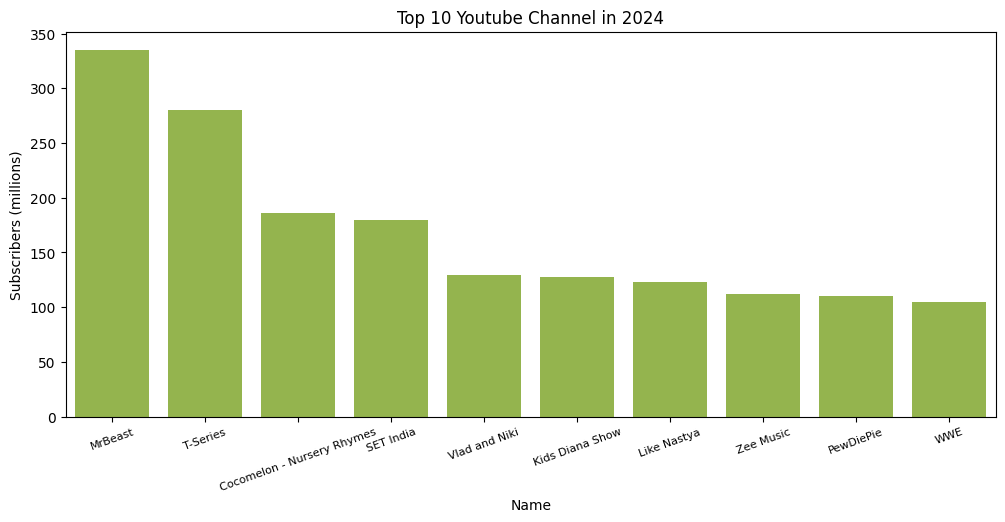

In [17]:
df = df.sort_values(by = 'Subscribers (millions)', ascending= False)
print(df.head(10))
plt.figure(figsize=(12,5))
plt.title("Top 10 Youtube Channel in 2024")
plt.xticks(fontsize = 8, rotation=20)
sns.barplot(data = df.head(10), x = 'Name', y ='Subscribers (millions)', color='#9BC53D')

We can see that there are more difference of subscribers between the first 4 channel. On the other hand, the difference between the last 6 channels are smaller.

2. Compare and visualize the other element in this dataset

First, we need to understand the variety of each element in order to choose the most suitable plot for visualization.

In [18]:
df_unique = df.iloc[:,1:]
for column in df_unique.columns: 
    print(f"{df_unique[column].nunique()} unique value(s) in column '{column}'")

2 unique value(s) in column 'Brand channel'
48 unique value(s) in column 'Subscribers (millions)'
11 unique value(s) in column 'Primary language'
11 unique value(s) in column 'Category'
16 unique value(s) in column 'Country'


For "Brand channel", because the variety is 2, we are going to use a pie chart for visalization. And for the rest of element we are going to use a bar chart in order to have a better view.

<function matplotlib.pyplot.show(close=None, block=None)>

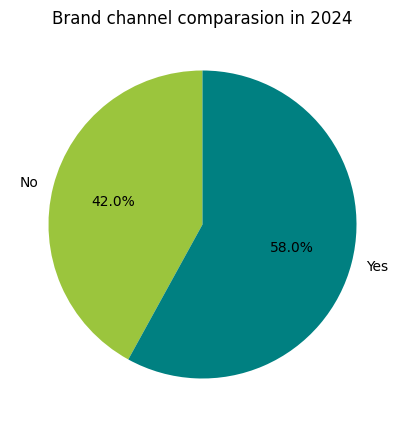

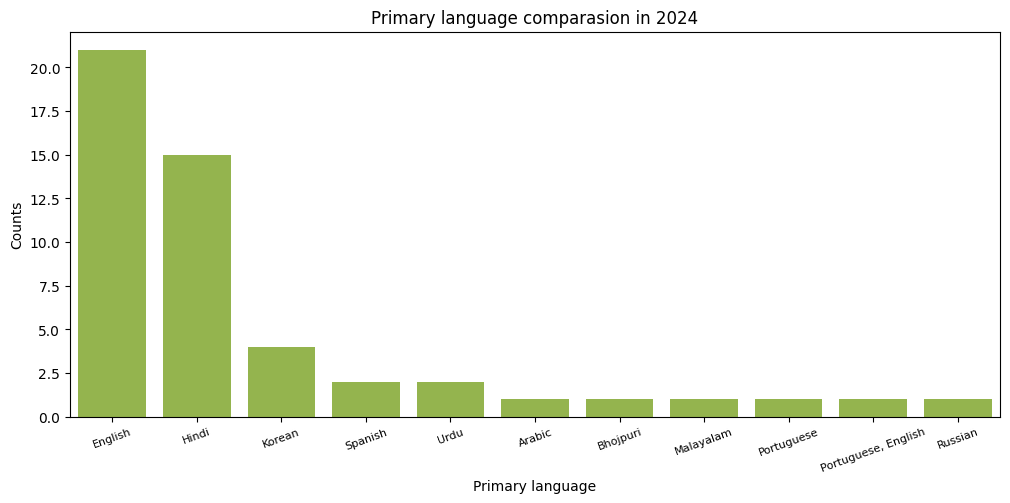

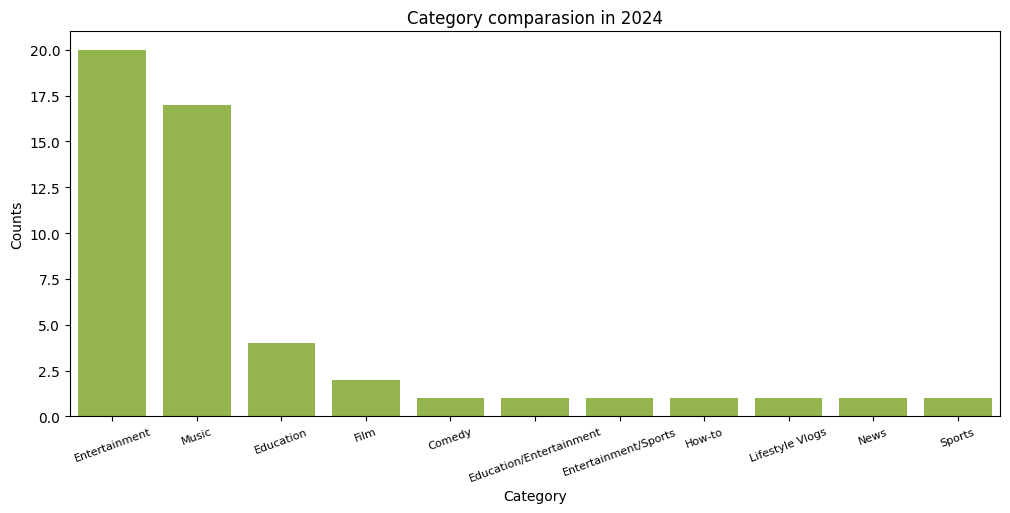

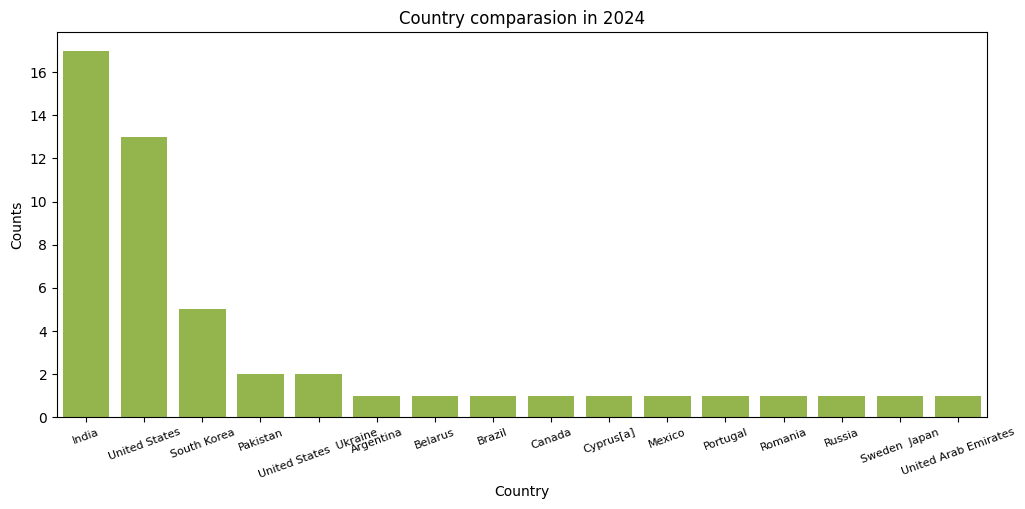

In [19]:
#Brand channel pie chart

df_brand = df.groupby('Brand channel').size()
colors = ['#9bc53d', '#008081']
plt.figure(figsize=(5, 5))
plt.pie(df_brand, labels = df_brand.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Brand channel comparasion in 2024')
plt.show

#Primary language bar chart
df_language = df.groupby('Primary language').size().reset_index(name='Counts')
df_language = df_language.sort_values(by = 'Counts', ascending= False)
plt.figure(figsize=(12,5))
plt.xticks(fontsize = 8, rotation=20)
plt.title('Primary language comparasion in 2024')
sns.barplot(data = df_language, x = 'Primary language', y = 'Counts', color = '#9bc53d')
plt.show

#Category bar chart
df_category = df.groupby('Category').size().reset_index(name='Counts')
df_category = df_category.sort_values(by = 'Counts', ascending= False)
plt.figure(figsize=(12,5))
plt.xticks(fontsize = 8, rotation=20)
plt.title('Category comparasion in 2024')
sns.barplot(data = df_category, x = 'Category', y = 'Counts', color = '#9bc53d')
plt.show

#Country bar chart
df_country = df.groupby('Country').size().reset_index(name='Counts')
df_country = df_country.sort_values(by = 'Counts', ascending= False)
plt.figure(figsize=(12,5))
plt.xticks(fontsize = 8, rotation=20)
plt.title('Country comparasion in 2024')
sns.barplot(data = df_country, x = 'Country', y = 'Counts', color = '#9bc53d')
plt.show


3. Which kinds/categories of youtuber is more populated in each language?
However, there is a channel have 2 language - "Portuguese, English". In this case, we are going to use his country to decide which language we are going to categorize this channel into

In [ ]:
print(df[df['Primary language'].str.contains('Portuguese, English',case = False)])

              Name Brand channel  Subscribers (millions)     Primary language  \
24  UR · Cristiano            No                    71.3  Portuguese, English   

                Category   Country  
24  Entertainment/Sports  Portugal  


We see that this channel is from Portugal; thus, we are going to categorize it under the 'Portuguese' language, as we presume that their primary target audience will be from Portugal.

In [25]:
df_lan_cat = df
df_lan_cat['Primary language'] = df['Primary language'].replace('Portuguese, English','Portuguese')
df_lan_cat = df_lan_cat.groupby(['Primary language','Category'])['Subscribers (millions)'].sum().reset_index(name='Total Subscribers')
df_lan_cat = df_lan_cat.sort_values(by =['Primary language','Total Subscribers'], ascending= [True, False])
print(df_lan_cat)

   Primary language                 Category  Total Subscribers
0            Arabic            Entertainment               68.9
1          Bhojpuri                    Music               63.6
5           English            Entertainment             1119.7
8           English                    Music              314.8
3           English                Education              265.2
9           English                   Sports              105.0
7           English                   How-to               81.1
6           English                     Film               62.8
2           English                   Comedy               60.6
4           English  Education/Entertainment               60.2
13            Hindi                    Music              660.3
11            Hindi            Entertainment              511.8
10            Hindi                Education              160.8
12            Hindi                     Film              101.0
14            Hindi                     

We can see that audiences of different languages have different interests. For example, people tend to prefer entertainment channels in English, while Hindi music channels attract a larger audience that understands Hindi.